<a href="https://colab.research.google.com/github/Ridhi655/Different-Machine-Learning-Algorithms/blob/main/KNN_USA_Forensic_Science_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load dependencies and data**





**Importing required libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score


**Reading the train and test sets**

In [2]:
train = pd.read_csv("trainKNN.txt", header=None)

test = pd.read_csv('testKNN.txt', header=None)


In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


**Naming & dropping the irrelevant columns**

In [5]:
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train = train.drop('ID', axis=1) # Drop ID since irrelevant to predictions
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = test.drop('ID', axis=1)

**Data exploration and visualizaion**

In [6]:
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [8]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [9]:
test.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             18 non-null     float64
 1   Na             18 non-null     float64
 2   Mg             18 non-null     float64
 3   Al             18 non-null     float64
 4   Si             18 non-null     float64
 5   K              18 non-null     float64
 6   Ca             18 non-null     float64
 7   Ba             18 non-null     float64
 8   Fe             18 non-null     float64
 9   Type of glass  18 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 KB


In [12]:
train.shape,test.shape

((196, 10), (18, 10))

**correlation matrix **

In [13]:
cor = train.corr()
cor


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,0.009425,0.104980,-0.166670
Na,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.336526,-0.250335,0.484154
Mg,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.488494,0.066167,-0.714713
Al,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.477098,-0.067659,0.640944
Si,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,-0.162194,-0.058347,0.092812
K,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,-0.019632,-0.011720,0.029423
Ca,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.100585,0.120076,-0.019545
Ba,0.009425,0.336526,-0.488494,0.477098,-0.162194,-0.019632,-0.100585,1.000000,-0.030133,0.566769
Fe,0.104980,-0.250335,0.066167,-0.067659,-0.058347,-0.011720,0.120076,-0.030133,1.000000,-0.227560
Type of glass,-0.166670,0.484154,-0.714713,0.640944,0.092812,0.029423,-0.019545,0.566769,-0.227560,1.000000


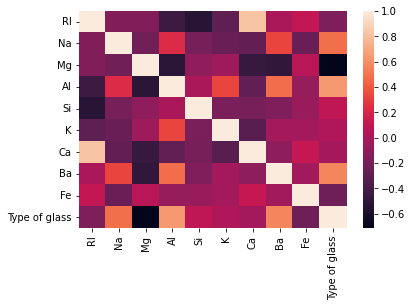

In [14]:
sns.heatmap(cor)

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K.(performed later)

**Scatter plot of two features, and pairwise plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


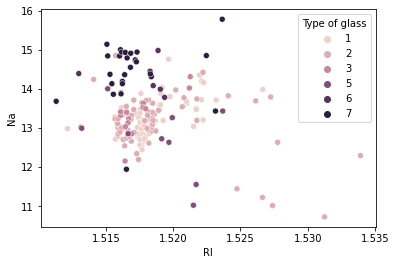

In [15]:
sns.scatterplot(train['RI'],train['Na'],hue=train['Type of glass'])

Suppose we consider only RI, and Na values for classification for glass type.

From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.
But there are a lot more than two features based on which we can classify. So let us take a look at pairwise plot to capture all the features.

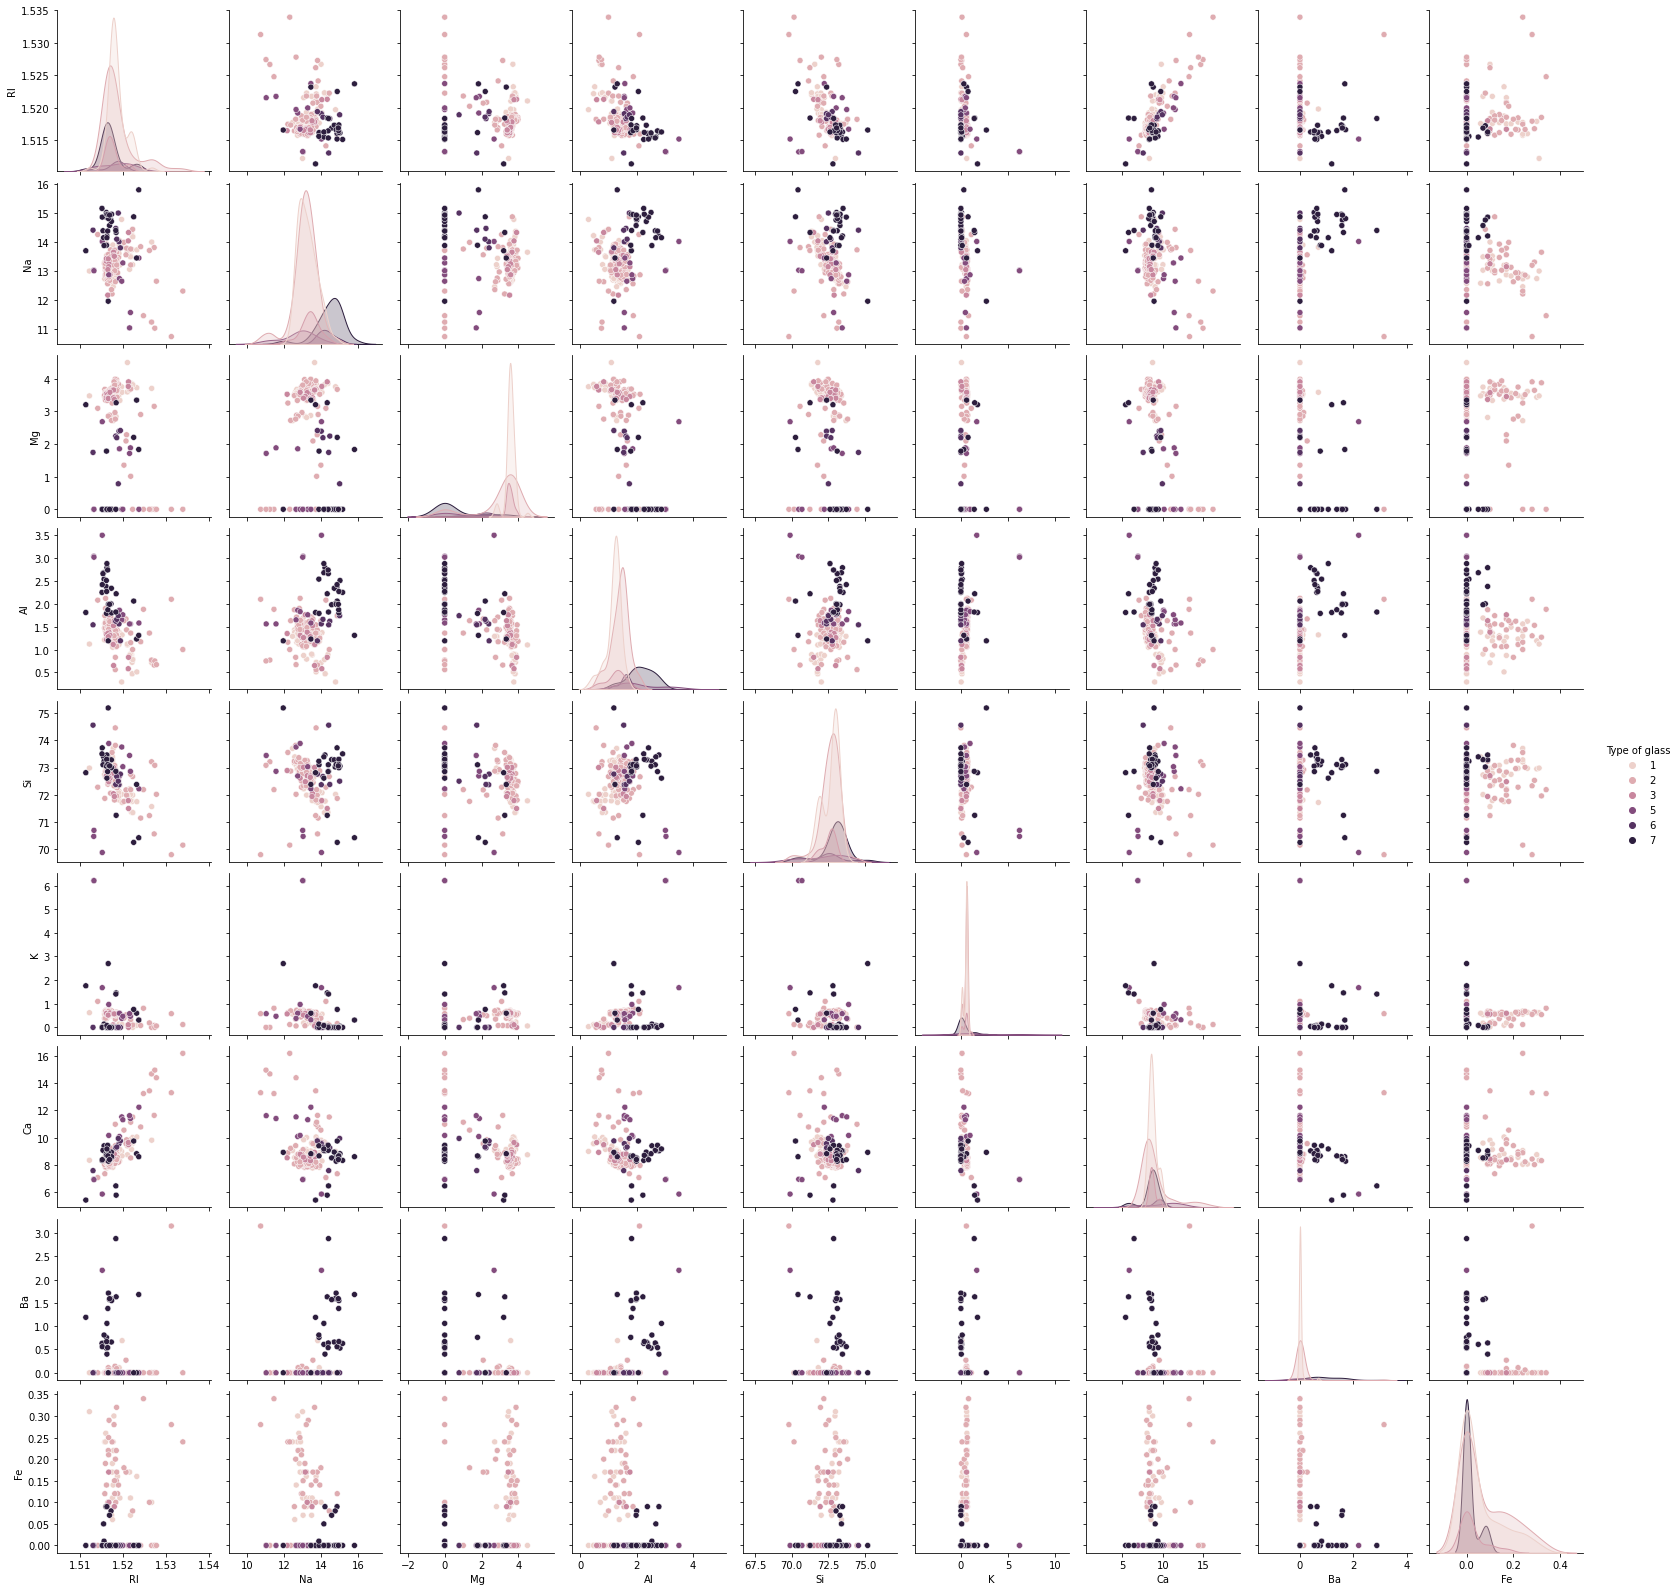

In [16]:
#pairwise plot of all the features
sns.pairplot(train,hue='Type of glass')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

**Feature Scaling**

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

Using standard scaler we can scale down to unit variance.

Formula:

z = (x - u) / s

where x -> value, u -> mean, s -> standard deviation

**Applying KNN**

*   Drop features that are not required
*   Experiment with distance metrics - Euclidean, manhattan



In [17]:
X_train = train[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']].values
y_train = train['Type of glass'].values
X_test=test[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']].values
y_test=test['Type of glass'].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  
  print("K value  : " , i,"train score:",knn.score(X_train,y_train), " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))
  #with inc in k,train score is decreasing,score increases and then decreases-underfitting

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


K value  :  1 train score: 1.0  score :  0.6573684210526315
K value  :  2 train score: 0.826530612244898  score :  0.6784210526315789
K value  :  3 train score: 0.8316326530612245  score :  0.6884210526315789
K value  :  4 train score: 0.7806122448979592  score :  0.6889473684210526
K value  :  5 train score: 0.7908163265306123  score :  0.6684210526315789


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


K value  :  6 train score: 0.7806122448979592  score :  0.6534210526315789
K value  :  7 train score: 0.7346938775510204  score :  0.6581578947368422
K value  :  8 train score: 0.7295918367346939  score :  0.6478947368421053
K value  :  9 train score: 0.7295918367346939  score :  0.6271052631578947
K value  :  10 train score: 0.7346938775510204  score :  0.6473684210526317
K value  :  20 train score: 0.6836734693877551  score :  0.5976315789473683
K value  :  50 train score: 0.6122448979591837  score :  0.5368421052631579


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


**Experiment with distance metrics - Euclidean**


In [18]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [19]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [20]:
y_pred = knn.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.49        18
weighted avg       0.60      0.56      0.49        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.5555555555555556


With this setup, We found the accuracy to be 55.56%

**Experiment with distance metrics - manhattan**

In [23]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')


In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [25]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.42      0.50      0.40        18
weighted avg       0.42      0.50      0.40        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.5


With this setup, We found the accuracy to be 50%

Findings -

* Euclidean distance produced better results (improved accuracy - more than 5%)
* Applying feature scaling improved accuracy by almost 5%.
* The best k value was found to be 4.
* Dropping ‘Ca’ produced better results by a bit, ‘K’ feature did not affect results in any way.
* Also, we noticed that RI and Ca are highly correlated

